# 🧭 Setup and Configuration

This block imports required libraries and utility functions for analysis.
It sets the parameters for:
- the log directory of simulation outputs,
- demand mode ("synthetic" or "real"),
- list of relocation strategies to analyze,
- region ID to visualize,
- time bin width (in minutes) for time series plots.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from datetime import timedelta

from utils import (
    plot_simulation_grid_for_strategies,
    summarize_multiple_runs,
    compute_system_metrics,
)

# Assume the dataframes are saved in CSV format under this directory
log_dir = "sim_outputs/0"
demand_mode = "real"  #"synthetic" or "real"
strategies = ["no_reloc", "JLCR", "shortest_wait", "fluidBased_policy"]
region_id = 48  # example region
bin_minutes = 60

# 📈 Plot Rider Demand and Service Over Time (Per Strategy)

This block produces a 3×2 grid of time series plots for a fixed demand mode (synthetic/real),
comparing how each relocation strategy performed over time in a given region.

Each subplot shows:
- Number of rider arrivals,
- Number of ride starts (fulfilled),
- Number of lost riders (unserved).

The system warm-up period is excluded from the plot.

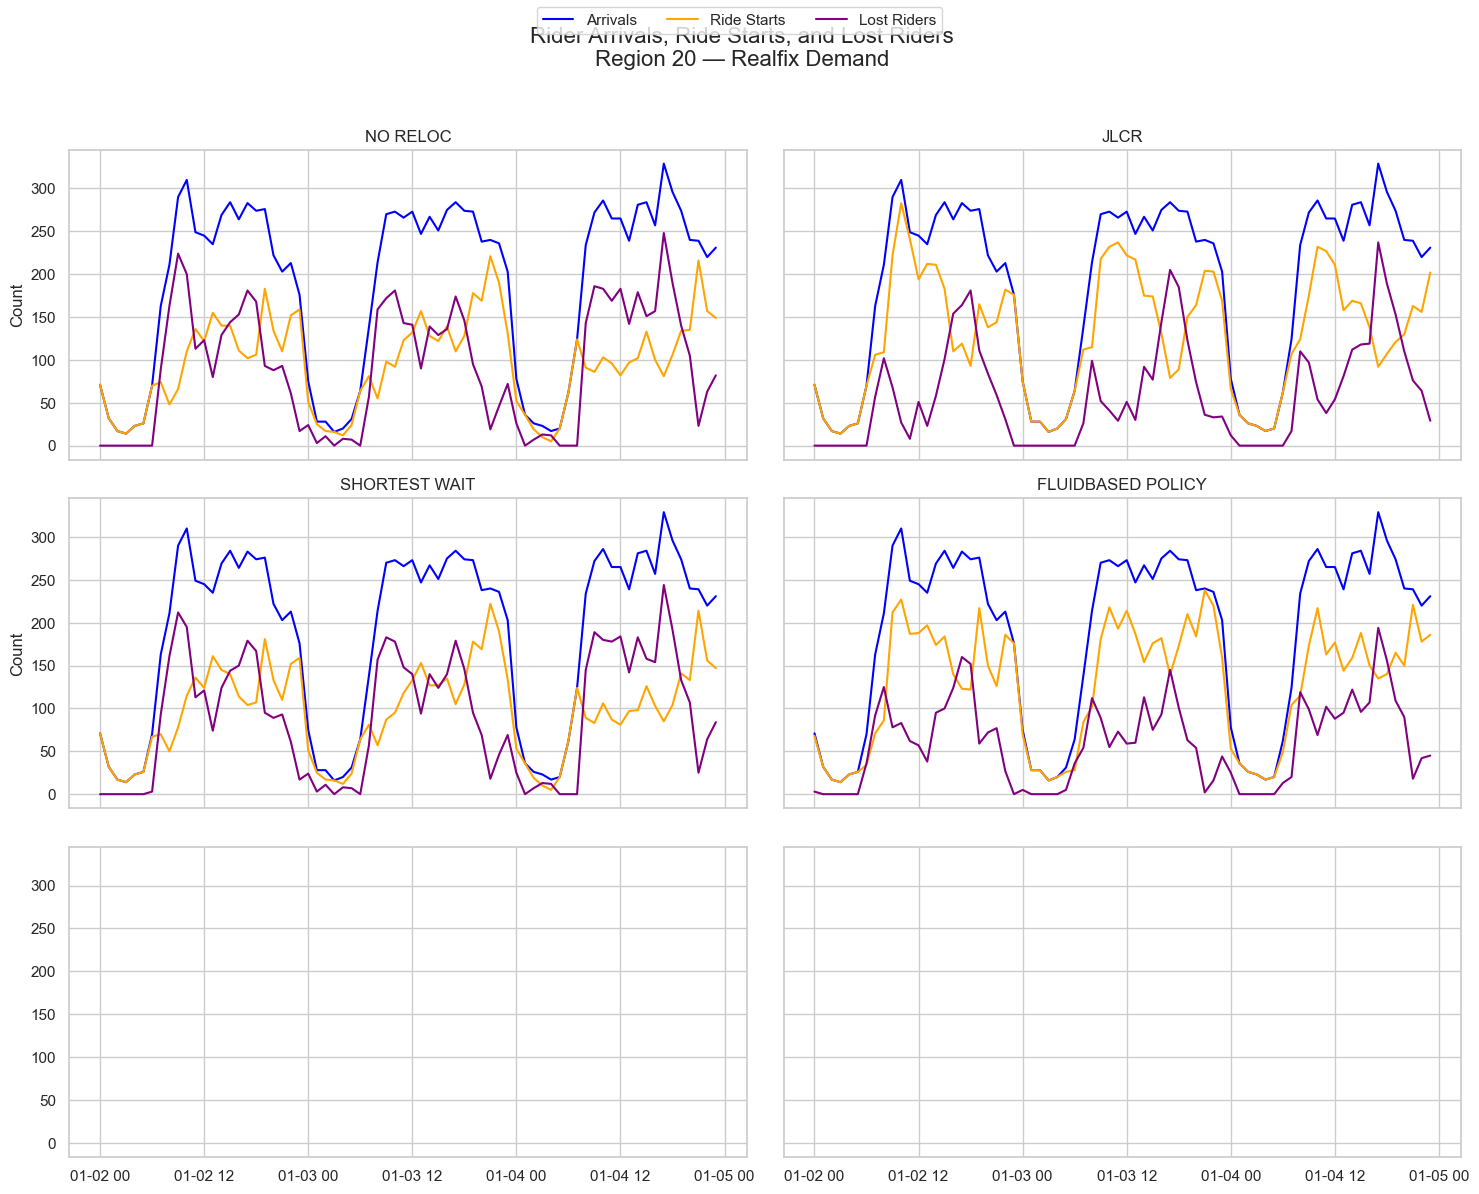

In [15]:
plot_simulation_grid_for_strategies(
    demand_mode="realFix",
    strategies=strategies,
    region_id=20,
    bin_minutes=bin_minutes,
    log_dir=log_dir
)

# 📋 System Metrics for a Single Run

This block loads a single simulation log (e.g. JLCR under synthetic demand)
and computes **9 scalar system-level performance metrics** using `compute_system_metrics()`:

- `abandonment_rate`: riders lost ÷ total requests
- `fulfillment_rate`: ride starts ÷ total requests
- `utilization_rate`: time spent on trips ÷ total vehicle time
- `idle_vehicle_fraction`: idle time ÷ total vehicle time
- `empty_relocation_ratio`: relocation time ÷ total vehicle time
- `peak_abandonment_rate`: worst 20-minute bin abandonment
- `relocations_per_vehicle_per_hour`: number of relocation events ÷ total vehicle-hours
- `max_regional_abandonment_rate`: highest regional loss rate
- `std_fulfillment_across_regions`: spatial variability in service rate


In [3]:
df_log = pd.read_csv("sim_outputs/0/synthetic_demand__fluidBased_policy.csv", converters={"data": eval})
df_log['datetime'] = pd.to_timedelta(df_log['time'], unit='h') + pd.Timestamp("2025-01-02")

metrics = compute_system_metrics(df_log, T=24, R=234, N=8000)
print(metrics)

{'abandonment_rate': 0.2259, 'fulfillment_rate': 0.7698, 'utilization_rate': np.float64(0.0), 'idle_vehicle_fraction': np.float64(1.0), 'empty_relocation_ratio': np.float64(0.0), 'peak_abandonment_rate': np.float64(0.3612), 'relocations_per_vehicle_per_hour': np.float64(0.5388), 'max_regional_abandonment_rate': np.float64(0.5556), 'std_fulfillment_across_regions': np.float64(0.0776)}


# 📊 Aggregate Metrics Across Multiple Simulation Runs

This block computes the same 9 metrics as above, but averaged across multiple repeated runs
of the same setting (e.g. 20 CSV files of 'synthetic_demand__no_reloc.csv').

The output is a table showing:
- Mean value for each metric across runs,
- Standard deviation across runs (useful to assess reliability/stability of the strategy).


In [7]:
summary_no_relo = summarize_multiple_runs("synthetic_demand__no_reloc.csv", T=24, R=234, N=8000)
print(summary_no_relo)

                                    mean     std
abandonment_rate                  0.4532  0.0019
fulfillment_rate                  0.5425  0.0018
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.8297  0.1555
relocations_per_vehicle_per_hour  0.0000  0.0000
max_regional_abandonment_rate     0.5901  0.0038
std_fulfillment_across_regions    0.0583  0.0008


In [8]:
summary_JLCR = summarize_multiple_runs("synthetic_demand__JLCR.csv", T=24, R=234, N=8000)
print(summary_JLCR)

                                    mean     std
abandonment_rate                  0.2411  0.0008
fulfillment_rate                  0.7546  0.0008
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.5049  0.2768
relocations_per_vehicle_per_hour  0.3484  0.0004
max_regional_abandonment_rate     0.7834  0.0136
std_fulfillment_across_regions    0.1649  0.0004


In [10]:
summary_fluid = summarize_multiple_runs("synthetic_demand__fluidBased_policy.csv", T=24, R=234, N=8000)
print(summary_fluid)

                                    mean     std
abandonment_rate                  0.2248  0.0011
fulfillment_rate                  0.7709  0.0011
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.6160  0.3505
relocations_per_vehicle_per_hour  0.5379  0.0013
max_regional_abandonment_rate     0.5613  0.0145
std_fulfillment_across_regions    0.0769  0.0024


In [11]:
summary_shortest_wait = summarize_multiple_runs("synthetic_demand__shortest_wait.csv", T=24, R=234, N=8000)
print(summary_shortest_wait)

                                    mean     std
abandonment_rate                  0.4517  0.0021
fulfillment_rate                  0.5440  0.0020
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.7714  0.1278
relocations_per_vehicle_per_hour  0.0000  0.0000
max_regional_abandonment_rate     0.5810  0.0036
std_fulfillment_across_regions    0.0576  0.0009


In [16]:
summaryR_no_relo = summarize_multiple_runs("realFix_demand__no_reloc.csv", T=24, R=234, N=8000)
summaryR_JLCR = summarize_multiple_runs("realFix_demand__JLCR.csv", T=24, R=234, N=8000)
summaryR_fluid = summarize_multiple_runs("realFix_demand__fluidBased_policy.csv", T=24, R=234, N=8000)
summaryR_shortWait = summarize_multiple_runs("realFix_demand__shortest_wait.csv", T=24, R=234, N=8000)

print('no Relo:')
print(summaryR_no_relo)
print('JLCR:')
print(summaryR_JLCR)
print('fluid:')
print(summaryR_fluid)
print('shortWait')
print(summaryR_shortWait)

no Relo:
                                    mean     std
abandonment_rate                  0.4870  0.0005
fulfillment_rate                  0.5130  0.0005
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.7525  0.0003
relocations_per_vehicle_per_hour  0.0000  0.0000
max_regional_abandonment_rate     0.6186  0.0015
std_fulfillment_across_regions    0.1077  0.0007
JLCR:
                                    mean     std
abandonment_rate                  0.3742  0.0008
fulfillment_rate                  0.6258  0.0008
utilization_rate                  0.0000  0.0000
idle_vehicle_fraction             1.0000  0.0000
empty_relocation_ratio            0.0000  0.0000
peak_abandonment_rate             0.5920  0.0016
relocations_per_vehicle_per_hour  0.3301  0.0004
max_regional_abandonment_rate     0.7682  0.0059
std_fulfillment_across_regions    0.1504  0.0018
fluid